## Topic Modeling — With Tomotopy

An attempt of topic modeling in the american women corpus of correspondance of the 18th Centrury

### Import Pachages

In [1]:
# Q1 (code)
import pandas as pd
import tomotopy as tp # for toping modeling
import little_mallet_wrapper # for functions concerning topic modeling
import seaborn # for statistical visualization
import glob # for finding pathnames
from pathlib import Path # for filesystem paths with semantics appropriate for different operating systems
import pandas as pd # for data wrangling 
import matplotlib.pyplot as plt #for plotting and visualization

### Data Preprocessing

In [2]:
# load dataset
df = pd.read_csv('women_corpus.csv')

In [3]:
df.dropna(subset=['text'], inplace=True)

In [93]:
pip install langdetect

^C
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Function to detect language
from langdetect import detect
def is_not_french(text):
    try:
        return detect(text) != 'fr'
    except:
        return True  # Handle cases where detection fails

# Apply the function to filter out French texts
df_cleaned = df[df['text'].apply(is_not_french)]

In [5]:
import nltk
from nltk.corpus import stopwords
import string
import re

#  First we should make empty lists for the values
training_data = []
original_texts = []
titles = []

nltk.download('stopwords')

stop_words = stopwords.words('english')
# Process tweets
# Define the unnecessary syntax to remove and some words that occured in the model and are not representative:
text_to_remove =  [
    'mr', 'mrs', 'sir', 'dear', 'tho', 'letter', 'tell', 'write', 'shall',
    'franklin', 'et', 'vous', 'que', 'le', 'je', 'des', 'la', 'en', 'monsieur',
    'dr', 'il', 'mon', 'pour', 'che', 'non', 'di', 'mi', 'friend', 'think', 'day',
    'said', 'great', 'know', 'hope', 'good', 'say', 'john', 'benjamin', 'leter', 'adams', 'time', 'letters',
    'upon', 'would', 'may', 'send', 'much', 'well', 'two', 'see', 'one', 'must', 'last',
    'little', 'says', 'make', 'could', 'per', 'sua', 'con', 'und', 'uns', 'lui', 'cranch', 'smith', 'tis', 'till','hear', 'thing', 'many', 'wou','untill', 'verey', 
    'shee', 'aney', 'thay', 'est', 'pas','qui', 'les', 'une', 'bien', 'dans', 'votre', 'plus' ,'nous' ,'avec','get' ,'let' ,'take' ,'want' ,'done' ,'better'
]

      


# Process the tweets:
for index, row in df_cleaned.iterrows():
    # Get the text from 'text' column:
    text = row['text']
    # make everything lowercase
    processed_text = text.lower()
    # remove punctuation
    processed_text = "".join(char for char in processed_text if char not in string.punctuation)
    # remove stopwords
    processed_text = ' '.join(word for word in processed_text.split() if word not in stop_words)
    # remove numbers
    processed_text = little_mallet_wrapper.process_string(text, numbers= 'remove')
    # remove unecessary words
    processed_text = ' '.join(word for word in processed_text.split() if word not in text_to_remove)
    # add processed text to training data:
    training_data.append(processed_text)
    # add original text
    original_texts.append(text)
    # add author to author:
    titles.append(row['authors'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
len(training_data), len(original_texts), len(titles)

(4917, 4917, 4917)

## Train Topic Model
We’re going to train our topic model with the tp.LDAModel() function, which provides Latent Dirichlet Allocation(LDA) topic modelling. Its implementation is based on following papers:

* Blei, D.M., Ng, A.Y., &Jordan, M.I. (2003). Latent dirichlet allocation.Journal of machine Learning research, 3(Jan), 993 - 1022.
* Newman, D., Asuncion, A., Smyth, P., &Welling, M. (2009). Distributed algorithms for topic models. Journal of Machine Learning Research, 10(Aug), 1801 - 1828.

In [21]:
# Number of topics to return
num_topics = 38
# Numer of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')


Topic Model Training...


Iteration: 0	Log-likelihood: -10.475888592299667
Iteration: 10	Log-likelihood: -10.02089222706738
Iteration: 20	Log-likelihood: -9.817095309449256
Iteration: 30	Log-likelihood: -9.709175351137148
Iteration: 40	Log-likelihood: -9.645381633071143
Iteration: 50	Log-likelihood: -9.601269724553203
Iteration: 60	Log-likelihood: -9.56766309347779
Iteration: 70	Log-likelihood: -9.542396447745375
Iteration: 80	Log-likelihood: -9.51870870702932
Iteration: 90	Log-likelihood: -9.500147856830644


## Display Topics and Top Words
To examine the 15 topics that the topic model extracted from theWomen Correspondance Corpuss, run the cell below.

Take a minute to read through every topic. Reflect on what each topic seems to capture as well as how well you think the topics capture the broad themes of the entire collection. Note any oddities, outliers, or inconsistencies.

In [23]:
# Print out top 10 words for each topic
print("\nTopic Model Results:\n\n")

topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")


Topic Model Results:


✨Topic 0✨

character person gentleman years subject opinion address private respect man

✨Topic 1✨

pleasure health madam friends family return kind best long wish

✨Topic 2✨

addressed bache self god brother wrote old sent love daughter

✨Topic 3✨

received president quincy philadelphia written son paper thomas papers however

✨Topic 4✨

president congress party state man made government people members senate

✨Topic 5✨

house got sick taken days bed came night black never

✨Topic 6✨

went ladies evening company house room lady morning made dinner

✨Topic 7✨

country man united spirit men never might thought honour justice

✨Topic 8✨

money year hundred pay best account house wish articles sent

✨Topic 9✨

yet mind heart friends happiness pen hands whilst virtue heaven

✨Topic 10✨

excellency honor humble beg liberty favor respect compliments husband obliged

✨Topic 11✨

every even man nature form always human mind without give

✨Topic 12✨

since arrived taken 

## Plot average coherence and retrain the model

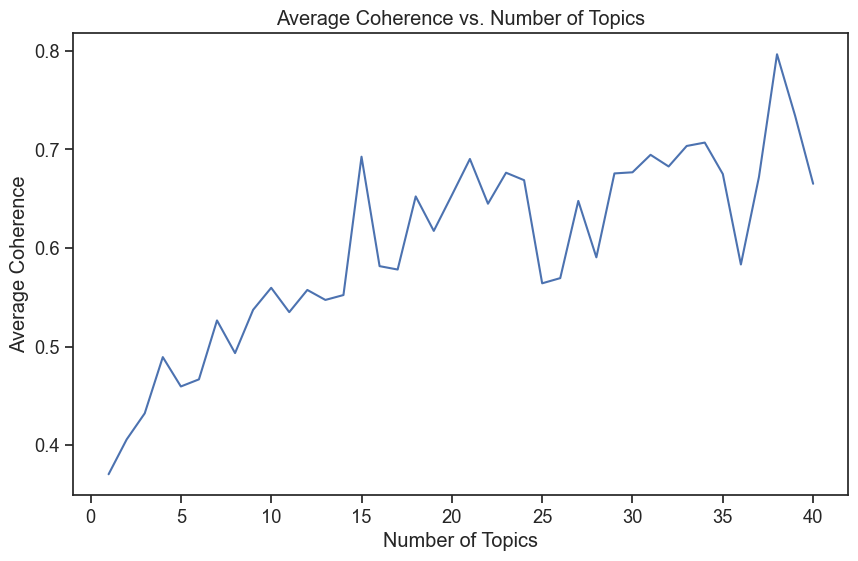

In [20]:
#define function that plots the average coherence

def plot_coherence(training_data, max_topics, iterations):
    coherence_scores = []
    for num_topics in range(1, max_topics + 1):
        
        # Initialize the model:
        model = tp.LDAModel(k=num_topics)
        # Add documents to the model:
        for doc in training_data:
            words = doc.split()
            model.add_doc(words)
        # Train the model:
        for i in range(0, iterations, 10):
            model.train(10)
        
        # Calculate coherence:
        coh = tp.coherence.Coherence(model, coherence='c_v')
        coherence_scores.append(coh.get_score())
        
    # Plot:
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_topics + 1), coherence_scores)
    plt.xlabel('Number of Topics')
    plt.ylabel('Average Coherence')
    plt.title('Average Coherence vs. Number of Topics')
    plt.savefig('topic_coherence.png')
    plt.show()

plot_coherence(training_data, max_topics=40, iterations=100)

In [22]:
# There are different metrics for coherence, we choose `c_v`

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.7561219092458488 
Per Topic: [0.8256786108016968, 0.8010345041751862, 0.7055427879095078, 0.7430401295423508, 0.8379171133041382, 0.7677537977695466, 0.7895733535289764, 0.756357553601265, 0.7318692058324814, 0.8198273420333863, 0.738109701871872, 0.742753142118454, 0.6928204417228698, 0.7706792533397675, 0.7425053834915161, 0.757406210899353, 0.7296069681644439, 0.7565747141838074, 0.7766985535621643, 0.7077130436897278, 0.6505901776254177, 0.7464332699775695, 0.6129978582262993, 0.7114566743373871, 0.8032193839550018, 0.7950932800769805, 0.7533648669719696, 0.7685772210359574, 0.7269937455654144, 0.8312963724136353, 0.7464935600757598, 0.8525001049041748, 0.7962073683738708, 0.72842458486557, 0.7785274177789688, 0.7678843379020691, 0.7298042565584183, 0.7393062591552735]



## Topic Distribution

In [27]:
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]


In [28]:
from IPython.display import Markdown, display
import re

def make_md(string):
    display(Markdown(str(string)))

def get_top_docs(docs, topic_distributions, topic_index, n=5):

    sorted_data = sorted([(_distribution[topic_index], _document)
                          for _distribution, _document
                          in zip(topic_distributions, docs)], reverse=True)

    topic_words = topics[topic_index]

    make_md(f"### ✨Topic {topic_index}✨\n\n{topic_words}\n\n")
    print("---")

    for probability, doc in sorted_data[:n]:
        # Make topic words bolded
        for word in topic_words.split():
            if word in doc.lower():
                doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)

        make_md(f'✨  \n**Topic Probability**: {probability}  \n**Document**: {doc}\n\n')

    return

In [29]:
import numpy as np

def get_top_unique_authors_with_distributions(titles, topic_distributions, topic_index=8, n=20):
    """
    Retrieve the top n unique authors most associated with a given topic.

    Parameters:
    titles (list): List of document authors.
    topic_distributions (list of lists or array-like): Topic distribution for each document.
    topic_index (int): Index of the topic of interest.
    n (int): Number of top unique authors to retrieve.

    Returns:
    list: Top n unique authors most associated with the specified topic.
    """
    # Convert topic_distributions to a NumPy array if it isn't one already
    topic_distributions = np.array(topic_distributions)
    
    # Extract the topic distribution for the specified topic
    topic_scores = topic_distributions[:, topic_index]
    
    # Get the indices of the documents sorted by topic score
    sorted_doc_indices = topic_scores.argsort()[::-1]
    
    unique_authors = []
    unique_distributions = []
    seen_authors = set()
    
    for i in sorted_doc_indices:
        author = titles[i]
        if author not in seen_authors:
            unique_authors.append(author)
            unique_distributions.append(topic_distributions[i])
            seen_authors.add(author)
        if len(unique_authors) == n:
            break
    
    return unique_authors, unique_distributions




Having manualy evaluate the topics to see which ones refer to politics and state affairs, I want to find the authors that contribute more to these topics, as well as the periods in which they are mostly discussed. Political Topics: [0, 3, 12, 16]

In [30]:
top_unique_authors_for_topic_3, top_distributions_for_topic_3 = get_top_unique_authors_with_distributions(titles, topic_distributions, topic_index=3, n=5)

print("Top 5 unique authors for Topic 3 and their topic distributions:")
for author, distribution in zip(top_unique_authors_for_topic_3, top_distributions_for_topic_3):
    print(f"Author: {author}, Distribution: {distribution}")

Top 5 unique authors for Topic 3 and their topic distributions:
Author: Adams, Abigail Smith, Distribution: [3.0529484e-02 1.2156630e-02 1.6773300e-03 4.0881723e-01 5.8852895e-03
 1.0134995e-02 5.6080343e-03 9.1216927e-03 1.1892102e-01 7.1331356e-03
 4.4240085e-03 2.9617077e-02 3.0486418e-02 4.1474244e-03 1.1266793e-02
 1.2533920e-01 3.1635319e-03 1.0902311e-02 9.5073814e-03 3.6399874e-03
 2.2671554e-04 7.0599541e-03 3.4100484e-04 2.5286251e-03 1.3414234e-02
 7.5357584e-03 1.9527304e-03 2.6054908e-02 6.1266534e-03 1.5759202e-04
 7.1528703e-03 2.7896665e-02 3.3032993e-04 1.6985742e-03 8.8052703e-03
 1.1225469e-02 6.4497869e-03 2.8563906e-02]
Author: Adams, Abigail, Distribution: [8.6551625e-03 1.7314337e-01 4.7552597e-04 3.9244357e-01 6.4519212e-02
 1.5443434e-02 1.4160032e-02 2.1441232e-02 2.2889557e-03 8.3073284e-03
 1.2542142e-03 2.1114205e-03 3.3783242e-02 1.1758020e-03 2.2049373e-02
 8.5814461e-02 1.3467010e-02 5.3371403e-02 2.6953593e-03 1.0319428e-03
 6.4274253e-05 2.0015093e-03 

In [32]:
top_unique_authors_for_topic_4, top_distributions_for_topic_4 = get_top_unique_authors_with_distributions(titles, topic_distributions, topic_index=4, n=5)

print("Top 5 unique authors for Topic 4 and their topic distributions:")
for author, distribution in zip(top_unique_authors_for_topic_4, top_distributions_for_topic_4):
    print(f"Author: {author}, Distribution: {distribution}")

Top 5 unique authors for Topic 4 and their topic distributions:
Author: Adams, Abigail, Distribution: [3.39400605e-03 4.93533490e-03 6.80960482e-04 3.96539085e-03
 3.26400816e-01 4.11459384e-03 2.27674330e-03 3.70321423e-03
 3.27781984e-03 4.78974991e-02 1.79605396e-03 3.02358647e-03
 3.03774811e-02 1.06840860e-02 4.57408000e-03 1.48837836e-02
 1.28432701e-03 4.42610774e-03 3.85979586e-03 1.47775793e-03
 9.20417151e-05 2.86619202e-03 1.38440766e-04 8.20294470e-02
 5.44589525e-03 3.05935857e-03 7.92767270e-04 1.09581254e-01
 2.48729158e-03 6.39790305e-05 2.90391408e-03 4.73267362e-02
 1.34106973e-04 6.36918247e-02 4.85763513e-02 4.55730315e-03
 8.36213604e-02 6.55982569e-02]
Author: Adams, Abigail Smith, Distribution: [2.87626078e-03 4.18246444e-03 2.34591272e-02 1.71162158e-01
 2.38472626e-01 2.63689701e-02 1.92943309e-03 7.17844293e-02
 2.77779833e-03 2.45414115e-03 1.52207143e-03 3.30717415e-02
 3.33708376e-02 1.42691308e-03 3.43857110e-02 2.02406570e-02
 1.08840677e-03 8.00244063e-0

In [33]:
top_unique_authors_for_topic_7, top_distributions_for_topic_7 = get_top_unique_authors_with_distributions(titles, topic_distributions, topic_index=7, n=5)

print("Top 5 unique authors for Topic 7 and their topic distributions:")
for author, distribution in zip(top_unique_authors_for_topic_7, top_distributions_for_topic_7):
    print(f"Author: {author}, Distribution: {distribution}")

Top 5 unique authors for Topic 7 and their topic distributions:
Author: Adams, Abigail Smith, Distribution: [6.3710874e-03 3.0951837e-02 2.0278247e-04 5.7464954e-02 2.2852811e-01
 1.2252802e-03 6.0383794e-03 3.7901029e-01 9.7609835e-04 4.6425689e-02
 5.3484493e-04 2.2341954e-02 1.0054907e-03 8.5419929e-03 4.6925429e-02
 1.7520302e-03 3.8245833e-04 2.2759609e-02 1.4550381e-02 4.4005987e-04
 2.7409000e-05 8.5352018e-04 4.1226122e-05 4.8549216e-02 2.0383094e-02
 9.1104297e-04 2.3607728e-04 4.6973868e-04 7.4068783e-04 1.9052244e-05
 8.6475338e-04 3.3725949e-03 3.9935567e-05 2.0535081e-04 2.7866473e-02
 6.7175049e-03 7.7975338e-04 1.1493847e-02]
Author: Adams, Hannah, Distribution: [1.1364919e-01 2.5456231e-02 7.5578596e-04 4.4011166e-03 1.2641140e-02
 4.5667146e-03 2.5269170e-03 3.4374616e-01 3.6379942e-03 3.2141104e-03
 6.1929181e-02 7.3280893e-02 3.7475415e-03 1.8687826e-03 5.5023167e-02
 2.6508544e-02 1.4254517e-03 2.4891049e-02 4.4241101e-02 1.6401373e-03
 1.0215546e-04 3.1811357e-03 1

In [34]:
top_unique_authors_for_topic_31, top_distributions_for_topic_31 = get_top_unique_authors_with_distributions(titles, topic_distributions, topic_index=31, n=5)

print("Top 5 unique authors for Topic 31 and their topic distributions:")
for author, distribution in zip(top_unique_authors_for_topic_31, top_distributions_for_topic_31):
    print(f"Author: {author}, Distribution: {distribution}")

Top 5 unique authors for Topic 31 and their topic distributions:
Author: Adams, Abigail Smith, Distribution: [3.8101688e-02 2.2280987e-03 3.0742539e-04 1.1149852e-01 9.8597169e-02
 1.8575682e-03 1.0278551e-03 6.2620908e-02 1.4797995e-03 1.3073796e-03
 1.3000656e-02 1.3650238e-03 1.5243593e-03 1.2949962e-02 6.1282776e-03
 3.1099034e-02 5.7982031e-04 1.0124745e-02 5.8058081e-03 6.6714629e-04
 4.1553012e-05 1.2939667e-03 6.2500250e-05 2.0779805e-02 1.0585137e-02
 1.3811733e-03 4.4211717e-03 7.1214041e-04 1.7375991e-02 2.8883873e-05
 1.3109966e-03 4.4800946e-01 6.0543727e-05 3.1131908e-04 1.3803665e-02
 6.7069761e-02 9.3086744e-03 1.1719959e-03]
Author: Church, Angelica Schuyler, Distribution: [7.3550910e-02 2.1179197e-02 1.0349135e-03 3.3383641e-02 1.7309777e-02
 6.2532974e-03 3.4601602e-03 7.4020840e-02 4.9815811e-03 4.4011483e-03
 1.6408166e-02 4.5952010e-03 5.1315869e-03 2.5589629e-03 6.9516175e-03
 4.9977254e-02 1.9519008e-03 2.0405283e-02 5.8660596e-03 2.2458741e-03
 1.3988360e-04 8.

In [35]:
# Step 4: Define the function to get top periods
def get_top_periods(topic_distributions, periods, topic_index=8, n=2):
    """
    Retrieve the top n periods most associated with a given topic.

    Parameters:
    topic_distributions (array-like): Topic distribution for each document.
    periods (list): List of periods corresponding to each document.
    topic_index (int): Index of the topic of interest.
    n (int): Number of top periods to retrieve.

    Returns:
    list: Top n periods most associated with the specified topic.
    """
    topic_distributions = np.array(topic_distributions)
    topic_scores = topic_distributions[:, topic_index]
    sorted_doc_indices = topic_scores.argsort()[::-1]
    
    unique_periods = []
    seen_periods = set()
    
    for i in sorted_doc_indices:
        period = periods[i]
        if period not in seen_periods:
            unique_periods.append(period)
            seen_periods.add(period)
        if len(unique_periods) == n:
            break
    
    return unique_periods



In [37]:
# Step 5: Use the function to get top periods
periods = df_cleaned['period'].tolist()  # Convert the column to a list
top_periods_for_topic_3 = get_top_periods(topic_distributions, periods, topic_index=3, n=2)

print("Top 2 periods for Topic 3:")
for period in top_periods_for_topic_3:
    print(period)

Top 2 periods for Topic 3:
Adams Presidency
Washington Presidency


In [38]:

top_periods_for_topic_4 = get_top_periods(topic_distributions, periods, topic_index=4, n=2)

print("Top periods for Topic 4:")
for period in top_periods_for_topic_4:
    print(period)

Top periods for Topic 4:
Confederation Period
Jefferson Presidency


In [39]:

top_periods_for_topic_7 = get_top_periods(topic_distributions, periods, topic_index=7, n=2)

print("Top periods for Topic 7:")
for period in top_periods_for_topic_7:
    print(period)

Top periods for Topic 7:
Jefferson Presidency
Adams Presidency


In [40]:

top_periods_for_topic_31 = get_top_periods(topic_distributions, periods, topic_index=31, n=2)

print("Top periods for Topic 31:")
for period in top_periods_for_topic_31:
    print(period)

Top periods for Topic 31:
Adams Presidency
Washington Presidency


In [41]:
def get_top_letters(topic_distributions, letters, topic_index=8, n=20):
   

  
    topic_distributions = np.array(topic_distributions)
    topic_scores = topic_distributions[:, topic_index]
    sorted_doc_indices = topic_scores.argsort()[::-1]
    
    unique_letters = []
    seen_letters = set()
    
    for i in sorted_doc_indices:
        letter = letters[i]
        if letter not in seen_letters:
            unique_letters.append(letter)
            seen_letters.add(letter)
        if len(unique_letters) == n:
            break
    
    return unique_letters



In [79]:
# Step 5: Use the function to get top periods
letters = df_cleaned['title'].tolist()  # Convert the column to a list
top_letters_for_topic_16 = get_top_letters(topic_distributions, letters, topic_index=31, n=20)

print("Top 10 letters for Topic 16:")
for letter in top_letters_for_topic_16:
    print(letter)

Top 10 letters for Topic 16:
From Abigail Smith Adams to Jeremy Belknap, 24 May 1798
From Abigail Smith Adams to Jeremy Belknap, 14 June 1798
To Alexander Hamilton from Angelica Church, 19 September 1794
To Alexander Hamilton from Angelica Church, [17 February 1793]
To George Washington from Catherine Sawbridge Macaulay Graham, 1 March 1791
To Thomas Jefferson from Mercy Otis Warren, 31 May 1801
To Thomas Jefferson from Abigail Adams, 29 January 1787
From Abigail Smith Adams to Mary Smith Cranch, 26 May 1798
Abigail Adams to John Cranch, 7 March 1787
To James Madison from Maria Aletta Hulshoff, 1 June 1814
Abigail Adams to Thomas Jefferson, 29 January 1787
Abigail Adams to John Quincy Adams, 12 September 1785
Abigail Adams to John Thaxter, 20 March 1785
Abigail Adams Smith to John Quincy Adams, 10 February 1788
Abigail Adams to William Smith, 30 March 1798
Mercy Otis Warren to John Adams, Dec. 1786
To George Washington from Madame Bobin des Orolles, 22 May 1792
Abigail Adams to John Qu

In [43]:
print(df_cleaned['period'].value_counts())

Madison Presidency         837
Revolutionary War          730
post-Madison Presidency    702
Adams Presidency           627
Confederation Period       622
Washington Presidency      605
Jefferson Presidency       538
Colonial                   256
Name: period, dtype: int64


Now, I want to plot and visualize the top women authors of letters that contribute overall in the political topics.

In [44]:


# Define political topics
political_topics = [3, 4, 7, 31, 33]

# Calculate and verify individual topic distributions
for topic in political_topics:
    df_cleaned[f'topic_{topic}_score'] = [dist[topic] for dist in topic_distributions]
    top_authors = df_cleaned.groupby('authors')[f'topic_{topic}_score'].sum().sort_values(ascending=False).head(10)
    print(f"Top authors for topic {topic}:\n{top_authors}\n")

# Ensure the political_score column is created correctly
df_cleaned['political_score'] = df_cleaned.apply(lambda row: sum([row[f'topic_{topic}_score'] for topic in political_topics]), axis=1)

# Verify that political_score column exists and is populated
print(df_cleaned[['authors', 'political_score']].head())

# Verify the top authors by aggregated political scores
top_authors = df_cleaned.groupby('authors')['political_score'].sum().sort_values(ascending=False).head(10)
print(f"Top authors by aggregated political scores:\n{top_authors}\n")




C:\Users\User\AppData\Local\Temp\ipykernel_20684\2440683436.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[f'topic_{topic}_score'] = [dist[topic] for dist in topic_distributions]
C:\Users\User\AppData\Local\Temp\ipykernel_20684\2440683436.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[f'topic_{topic}_score'] = [dist[topic] for dist in topic_distributions]
C:\Users\User\AppData\Local\Temp\ipykernel_20684\2440683436.py:6: SettingWithCopyWarning: 
A value is trying to be set on 

Top authors for topic 3:
authors
Adams, Abigail Smith               107.876183
Adams, Abigail                      76.094040
Adams, Louisa Catherine Johnson     10.222919
Cranch, Mary Smith                   1.944056
Peabody, Elizabeth Smith Shaw        1.788330
Warren, Mercy                        1.226473
Trist, Elizabeth House               0.690331
Hewson, Mary                         0.688227
Washington, Martha Custis            0.677190
Cushing, Hannah Phillips             0.626659
Name: topic_3_score, dtype: float32

Top authors for topic 4:
authors
Adams, Abigail Smith               38.038105
Adams, Abigail                     23.698689
Adams, Louisa Catherine Johnson    21.111801
Cranch, Mary Smith                  1.605229
Peabody, Elizabeth Smith Shaw       1.435290
Warren, Mercy                       1.333231
Ambler, Jacquelin                   0.957443
Trist, Elizabeth House              0.823937
Coolidge, Ellen Wayles Randolph     0.802314
Cushing, Hannah Phillips        

C:\Users\User\AppData\Local\Temp\ipykernel_20684\2440683436.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['political_score'] = df_cleaned.apply(lambda row: sum([row[f'topic_{topic}_score'] for topic in political_topics]), axis=1)


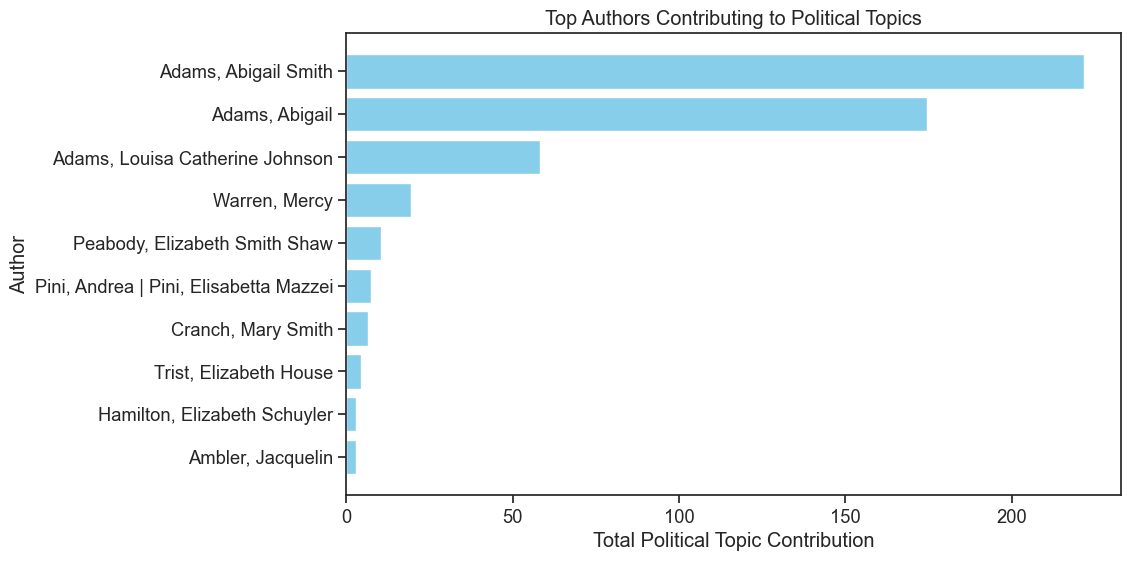

In [45]:
# Plot top authors contributing to political topics
plt.figure(figsize=(10, 6))
plt.barh(top_authors.index, top_authors.values, color='skyblue')  # Accessing values directly
plt.xlabel('Total Political Topic Contribution')
plt.ylabel('Author')
plt.title('Top Authors Contributing to Political Topics')
plt.gca().invert_yaxis()
plt.show()



Now, we want to see in which period were the political topics that we identified more discussed. 

C:\Users\User\AppData\Local\Temp\ipykernel_20684\2552046712.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['political_score'] = [sum([topic_dist[i] for i in political_topics]) for topic_dist in topic_distributions]
C:\Users\User\AppData\Local\Temp\ipykernel_20684\2552046712.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['period'] = pd.Categorical(df_cleaned['period'], categories=period_order, ordered=True)


Madison Presidency         837
Revolutionary War          730
post-Madison Presidency    702
Adams Presidency           627
Confederation Period       622
Washington Presidency      605
Jefferson Presidency       538
Colonial                   256
Name: period, dtype: int64


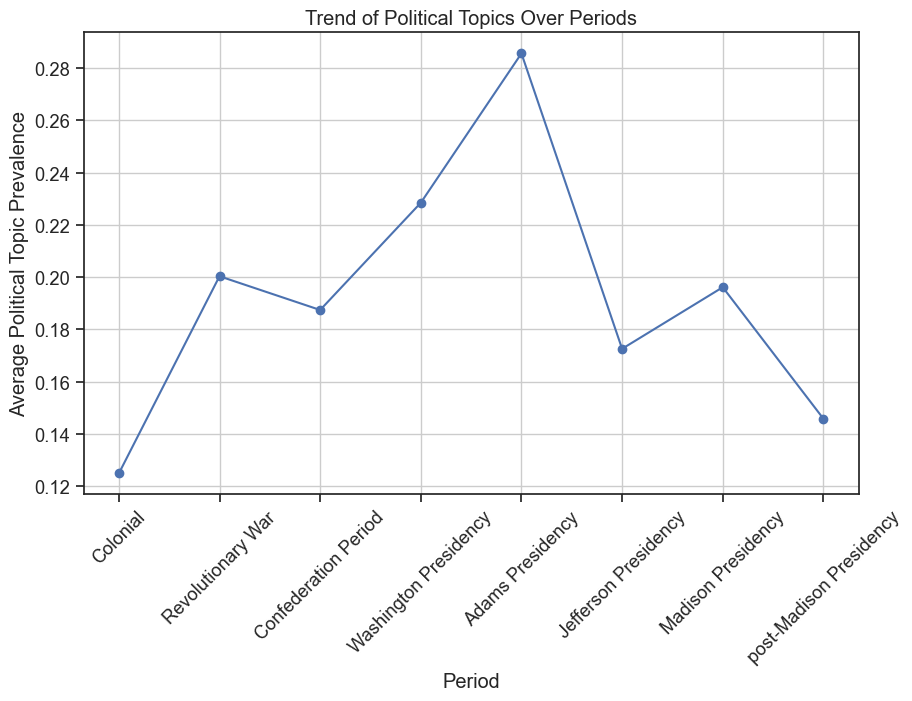

In [75]:
# Step 1: Categorize Topics 
political_topics = [ 0, 3, 4, 7, 12, 31, 33]

# Step 2: Calculate political scores
# Verify topic distributions and calculate political scores accurately
df_cleaned['political_score'] = [sum([topic_dist[i] for i in political_topics]) for topic_dist in topic_distributions]

# Step 3: Define the correct order of periods
period_order = ["Colonial", "Revolutionary War", "Confederation Period", "Washington Presidency", "Adams Presidency", "Jefferson Presidency", "Madison Presidency", "post-Madison Presidency"]
df_cleaned['period'] = pd.Categorical(df_cleaned['period'], categories=period_order, ordered=True)

# Verify if there are documents in each period
print(df_cleaned['period'].value_counts())

# Step 4: Group by period and calculate average political topic prevalence
period_political_trends = df_cleaned.groupby('period')['political_score'].mean().reindex(period_order).reset_index()

# Plot the trend of political topics over periods
plt.figure(figsize=(10, 6))
plt.plot(period_political_trends['period'], period_political_trends['political_score'], marker='o')
plt.xlabel('Period')
plt.ylabel('Average Political Topic Prevalence')
plt.title('Trend of Political Topics Over Periods')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Madison Presidency         837
Revolutionary War          730
post-Madison Presidency    702
Adams Presidency           627
Confederation Period       622
Washington Presidency      605
Jefferson Presidency       538
Colonial                   256
Name: period, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_20684\2008827694.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['domestic_score'] = [sum([topic_dist[i] for i in domestic_topics]) for topic_dist in topic_distributions]
C:\Users\User\AppData\Local\Temp\ipykernel_20684\2008827694.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['period'] = pd.Categorical(df_cleaned['period'], categories=period_order, ordered=True)


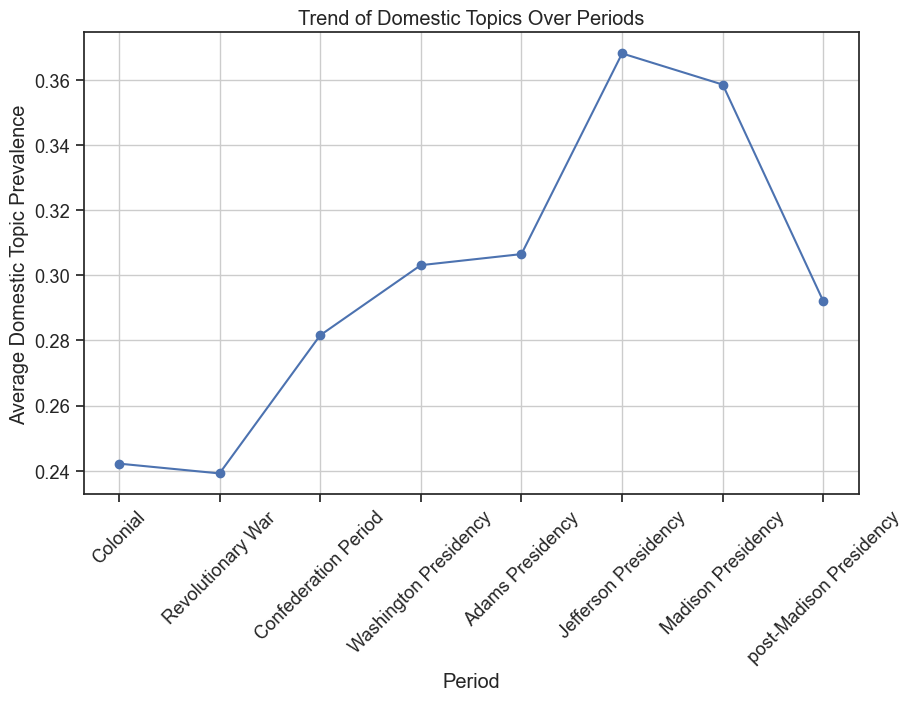

In [47]:
# Step 1: Categorize Topics 
domestic_topics = [ 5, 8, 16, 17, 18, 25, 26, 34, 35]

# Step 2: Calculate political scores
# Verify topic distributions and calculate political scores accurately
df_cleaned['domestic_score'] = [sum([topic_dist[i] for i in domestic_topics]) for topic_dist in topic_distributions]

# Step 3: Define the correct order of periods
period_order = ["Colonial", "Revolutionary War", "Confederation Period", "Washington Presidency", "Adams Presidency", "Jefferson Presidency", "Madison Presidency", "post-Madison Presidency"]
df_cleaned['period'] = pd.Categorical(df_cleaned['period'], categories=period_order, ordered=True)

# Verify if there are documents in each period
print(df_cleaned['period'].value_counts())

# Step 4: Group by period and calculate average political topic prevalence
period_domestic_trends = df_cleaned.groupby('period')['domestic_score'].mean().reindex(period_order).reset_index()

# Plot the trend of political topics over periods
plt.figure(figsize=(10, 6))
plt.plot(period_domestic_trends['period'], period_domestic_trends['domestic_score'], marker='o')
plt.xlabel('Period')
plt.ylabel('Average Domestic Topic Prevalence')
plt.title('Trend of Domestic Topics Over Periods')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Madison Presidency         837
Revolutionary War          730
post-Madison Presidency    702
Adams Presidency           627
Confederation Period       622
Washington Presidency      605
Jefferson Presidency       538
Colonial                   256
Name: period, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_20684\958464831.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['miral_score'] = [sum([topic_dist[i] for i in moral_topics]) for topic_dist in topic_distributions]
C:\Users\User\AppData\Local\Temp\ipykernel_20684\958464831.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['period'] = pd.Categorical(df_cleaned['period'], categories=period_order, ordered=True)


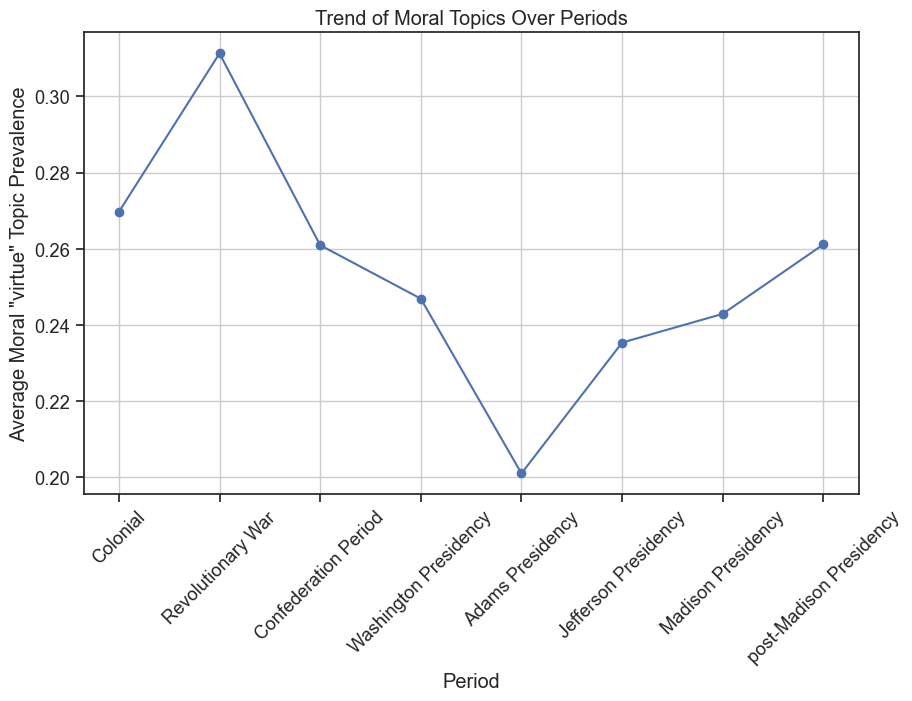

In [50]:
# Step 1: Categorize Topics 
moral_topics = [ 0, 9, 10, 11, 13, 14, 24, 28, 36]

# Step 2: Calculate political scores
# Verify topic distributions and calculate political scores accurately
df_cleaned['miral_score'] = [sum([topic_dist[i] for i in moral_topics]) for topic_dist in topic_distributions]

# Step 3: Define the correct order of periods
period_order = ["Colonial", "Revolutionary War", "Confederation Period", "Washington Presidency", "Adams Presidency", "Jefferson Presidency", "Madison Presidency", "post-Madison Presidency"]
df_cleaned['period'] = pd.Categorical(df_cleaned['period'], categories=period_order, ordered=True)

# Verify if there are documents in each period
print(df_cleaned['period'].value_counts())

# Step 4: Group by period and calculate average political topic prevalence
period_moral_trends = df_cleaned.groupby('period')['moral_score'].mean().reindex(period_order).reset_index()

# Plot the trend of political topics over periods
plt.figure(figsize=(10, 6))
plt.plot(period_moral_trends['period'], period_moral_trends['moral_score'], marker='o')
plt.xlabel('Period')
plt.ylabel('Average Moral "virtue" Topic Prevalence')
plt.title('Trend of Moral Topics Over Periods')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Now, I lets do the same for topics that have to do with virtue and republican ideology.

In [48]:
# Define  topics
moral_topics = [0, 9, 10, 11, 13, 14, 24, 28, 36]

# Calculate and verify individual topic distributions
for topic in moral_topics:
    df_cleaned[f'topic_{topic}_score'] = [dist[topic] for dist in topic_distributions]
    top_authors = df_cleaned.groupby('authors')[f'topic_{topic}_score'].sum().sort_values(ascending=False).head(10)
    print(f"Top authors for topic {topic}:\n{top_authors}\n")

# Ensure the political_score column is created correctly
df_cleaned['moral_score'] = df_cleaned.apply(lambda row: sum([row[f'topic_{topic}_score'] for topic in moral_topics]), axis=1)

# Verify that political_score column exists and is populated
print(df_cleaned[['authors', 'moral_score']].head())

# Verify the top authors by aggregated political scores
top_authors = df_cleaned.groupby('authors')['moral_score'].sum().sort_values(ascending=False).head(10)
print(f"Top authors by aggregated moral scores:\n{top_authors}\n")


Top authors for topic 0:
authors
Adams, Abigail Smith               32.118797
Adams, Abigail                     25.541687
Adams, Louisa Catherine Johnson    12.796041
Warren, Mercy                       4.567707
Peabody, Elizabeth Smith Shaw       3.335884
Trist, Elizabeth House              2.178710
Cranch, Mary Smith                  1.882679
Hewson, Mary                        1.774444
Paradise, Lucy Ludwell              1.681817
Murray, Judith Sargent              0.971485
Name: topic_0_score, dtype: float32

Top authors for topic 9:
authors
Adams, Abigail                     42.898960
Adams, Abigail Smith               27.721384
Adams, Louisa Catherine Johnson     8.871204
Warren, Mercy                       8.374508
Peabody, Elizabeth Smith Shaw       5.209175
Hewson, Mary                        1.581603
Cranch, Mary Smith                  1.085418
Cosway, Maria Hadfield              0.796354
Trist, Elizabeth House              0.641411
Coolidge, Ellen Wayles Randolph     0.6051

C:\Users\User\AppData\Local\Temp\ipykernel_20684\235315788.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[f'topic_{topic}_score'] = [dist[topic] for dist in topic_distributions]
C:\Users\User\AppData\Local\Temp\ipykernel_20684\235315788.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[f'topic_{topic}_score'] = [dist[topic] for dist in topic_distributions]
C:\Users\User\AppData\Local\Temp\ipykernel_20684\235315788.py:6: SettingWithCopyWarning: 
A value is trying to be set on a c

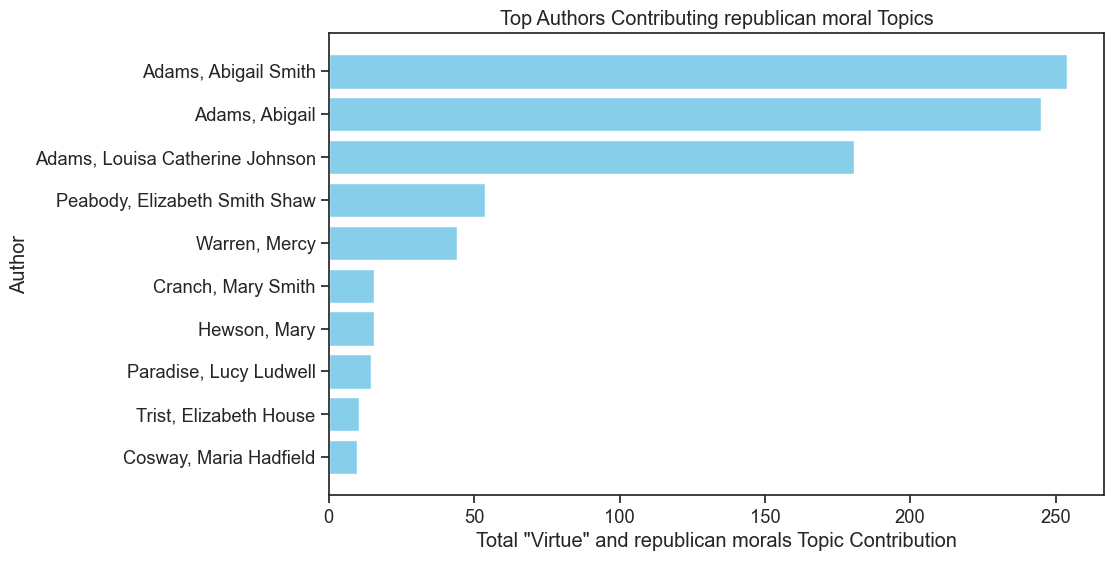

In [49]:
plt.figure(figsize=(10, 6))
plt.barh(top_authors.index, top_authors.values, color='skyblue')  # Accessing values directly
plt.xlabel('Total "Virtue" and republican morals Topic Contribution')
plt.ylabel('Author')
plt.title('Top Authors Contributing republican moral Topics')
plt.gca().invert_yaxis()
plt.show()

Madison Presidency         837
Revolutionary War          730
post-Madison Presidency    702
Adams Presidency           627
Confederation Period       622
Washington Presidency      605
Jefferson Presidency       538
Colonial                   256
Name: period, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_20684\807699421.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['social_score'] = [sum([topic_dist[i] for i in social_topics]) for topic_dist in topic_distributions]
C:\Users\User\AppData\Local\Temp\ipykernel_20684\807699421.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['period'] = pd.Categorical(df_cleaned['period'], categories=period_order, ordered=True)


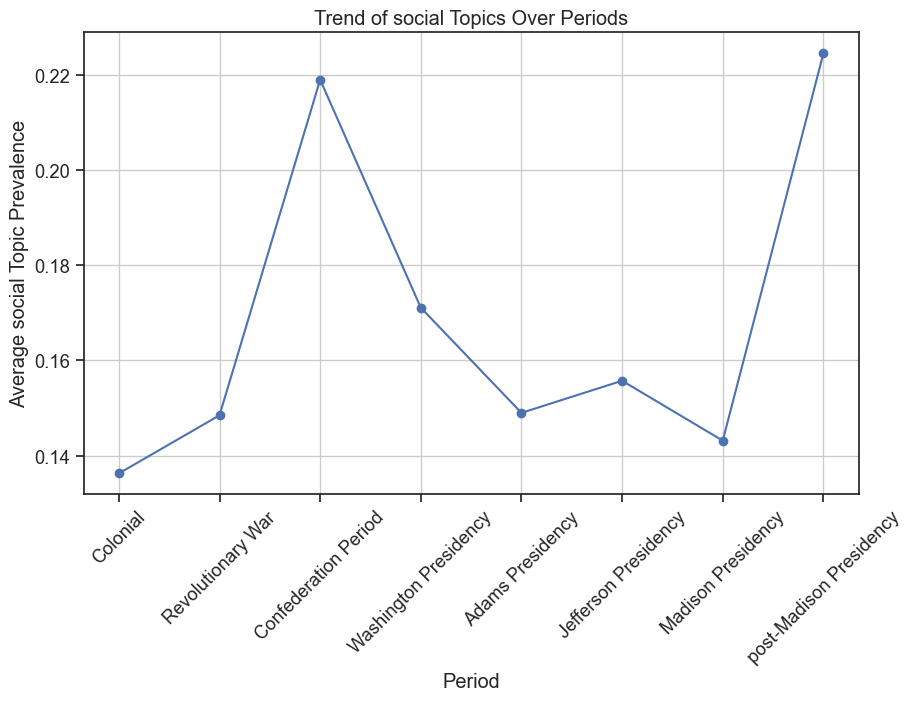

In [53]:
# Step 1: Categorize Topics 
social_topics = [1, 6, 21, 27, 30, 37]

# Step 2: Calculate political scores
# Verify topic distributions and calculate political scores accurately
df_cleaned['social_score'] = [sum([topic_dist[i] for i in social_topics]) for topic_dist in topic_distributions]

# Step 3: Define the correct order of periods
period_order = ["Colonial", "Revolutionary War", "Confederation Period", "Washington Presidency", "Adams Presidency", "Jefferson Presidency", "Madison Presidency", "post-Madison Presidency"]
df_cleaned['period'] = pd.Categorical(df_cleaned['period'], categories=period_order, ordered=True)

# Verify if there are documents in each period
print(df_cleaned['period'].value_counts())

# Step 4: Group by period and calculate average political topic prevalence
period_social_trends = df_cleaned.groupby('period')['social_score'].mean().reindex(period_order).reset_index()

# Plot the trend of political topics over periods
plt.figure(figsize=(10, 6))
plt.plot(period_social_trends['period'], period_social_trends['social_score'], marker='o')
plt.xlabel('Period')
plt.ylabel('Average social Topic Prevalence')
plt.title('Trend of social Topics Over Periods')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [71]:
# Function to find the most associated topic for a given word
def find_word_topic_association(model, word):
    # Ensure the word is in the vocabulary
    if word in model.used_vocabs:
        word_id = model.used_vocabs[word]  # Get the word ID
        topic_probs = model.get_topic_word_dist(word_id)
        most_associated_topic = topic_probs.argmax()
        return most_associated_topic, topic_probs[most_associated_topic]
    else:
        return None, None

# Example usage
word = 'liberty'  # Replace with your word of interest
topic, prob = find_word_topic_association(model, word)

if topic is not None:
    print(f"The word '{word}' is most associated with topic {topic} with a probability of {prob:.4f}")
else:
    print(f"The word '{word}' is not in the vocabulary of the model")

# To get words associated with a topic
if topic is not None:
    top_words = model.get_topic_words(topic, top_n=10)
    print(f"Top words in topic {topic}: {[word for word, prob in top_words]}")

TypeError: sequence index must be integer, not 'str'